In [1]:
import sqlalchemy
import pandas as pd
import os
from correctingagent.util.util import get_config
from correctingagent.experiments.experiment_tracking import *
from correctingagent.experiments.evaluation import read_file
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel
%matplotlib inline

In [4]:
db_location = '/home/mappelgren/Desktop/correcting-agent/db'
big_db = os.path.join(db_location, 'big.db')
rels_db = os.path.join(db_location, 'rels.db')
experiments_db = os.path.join(db_location, 'experiments.db')

# big_engine = sqlalchemy.create_engine('sqlite:///' + big_db)

# rels_engine = sqlalchemy.create_engine('sqlite:///' + rels_db)
engine = sqlalchemy.create_engine('sqlite:///' + experiments_db)

In [5]:
big = pd.read_sql('big', index_col='index', con=engine)
rels = pd.read_sql('rels', index_col='index', con=engine)
experiments = pd.read_sql('experiments', index_col='index', con=engine)

In [6]:
big

,experiment_name,status
index,,
0,None,None
1,bigthreerules_test,running
2,bigthreerules_test,running
3,bigthreerules_test,running
4,bigthreerules_test,running
5,bigthreerules_test,running
6,bigthreerules_test,running
7,bigthreerules_test,running
8,bigthreerules_test,running


In [4]:
# experiments.iloc[849].status = 'removed'
# experiments.to_sql('experiments', con=engine, if_exists='replace')

In [5]:
experiments.iloc[rels[rels.big_id == 37].experiment_id.values]

,config_name,experiment_file,neural_config,status
index,,,,
826,bigmaroon/bigmaroon11,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
827,bigmaroon/bigmaroon30,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
828,bigmaroon/bigmaroon0,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
829,bigmaroon/bigmaroon27,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
830,bigmaroon/bigmaroon28,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
831,bigmaroon/bigmaroon4,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
832,bigmaroon/bigmaroon3,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
833,bigmaroon/bigmaroon22,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
834,bigmaroon/bigmaroon15,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done


In [6]:
experiments.iloc[rels[rels.big_id == 38].experiment_id.values]

,config_name,experiment_file,neural_config,status
index,,,,
876,bigmaroon/bigmaroon11,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
877,bigmaroon/bigmaroon30,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
878,bigmaroon/bigmaroon0,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
879,bigmaroon/bigmaroon27,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
880,bigmaroon/bigmaroon28,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
881,bigmaroon/bigmaroon4,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
882,bigmaroon/bigmaroon3,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
883,bigmaroon/bigmaroon22,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
884,bigmaroon/bigmaroon15,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done


In [7]:
big

,experiment_name,status
index,,
0,None,None
1,bigthreerules_test,running
2,bigthreerules_test,running
3,bigthreerules_test,running
4,bigthreerules_test,running
5,bigthreerules_test,running
6,bigthreerules_test,running
7,bigthreerules_test,running
8,bigthreerules_test,running


In [8]:
experiments

,config_name,experiment_file,neural_config,status
index,,,,
0,None,None,None,None
1,simple_neural,results/simplecolours/agents.NeuralCorrectingA...,DEFAULT,done
2,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:0.1,done
3,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:1,done
4,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0,done
5,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0.4,done
6,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
7,tworules_no_update,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
8,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done


In [9]:
values = rels[rels.big_id == 10].experiment_id.values

In [3]:
def get_experiments(big_id):
    config = get_config()
    engine = sqlalchemy.create_engine('sqlite:///{}/experiments.db'.format(config['db_location']))
    
    big = pd.read_sql('big', index_col='index', con=engine)
    rels = pd.read_sql('rels', index_col='index', con=engine)
    experiments = pd.read_sql('experiments', index_col='index', con=engine)
    
    relevant_ids = rels[rels.big_id == big_id].experiment_id.values
    relevant_experiments = experiments.iloc[relevant_ids]
    experiment_ids = relevant_experiments[relevant_experiments.status == 'done'].index.values
    return experiments.iloc[experiment_ids]

exp = get_experiments(10)
print(list(exp.index))

[504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553]


In [51]:
type(exp)

pandas.core.frame.DataFrame

In [2]:
def load_big_experiments(list_of_experiments):
    """plot the cumulative reward for a number of experiments listed on the same axis"""
    if isinstance(list_of_experiments, pd.core.frame.DataFrame):
        list_of_experiments = list_of_experiments.index
    experiments_df = read_experiments()
    #experiments = [get_baseline(dataset)]
    experiments = []
    for experiment in list_of_experiments:
        rf = get_results_file(experiments_df, experiment)
        experiments.append(read_file(rf.name)[0])
    return np.array(experiments) # [[experiment-i]]


def get_discounted_data(big_id):
    experiments = get_experiments(big_id)
    raw_data = load_big_experiments(experiments)
    discounted_data = -0.5*(raw_data+10)
    return discounted_data

def get_cumsum(big_id):
    discounted_data = get_discounted_data(big_id)
    cumsum = np.cumsum(discounted_data, axis=1)
    return cumsum 

def get_mean(big_id):
    cumsum = get_cumsum(big_id)
    mean = np.mean(cumsum, axis=0)
    
    return mean

def plot_big_experiments(list_of_experiments, labels, title=''):
    for experiment, label, marker in zip(list_of_experiments, labels, ['--', '-', '-.', ':']):#::['_', 'x', '+', '|']):
        cumsum = get_mean(experiment)
        plt.plot( range(1, 51), cumsum, label=label,linestyle=marker, linewidth=3)# marker=marker)
    plt.ylabel('regret', fontsize=13)
    plt.xlabel('scenario', fontsize=13)

    plt.legend(fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()
    
    
    
# raw_data = load_big_experiments(get_experiments(10), 'bigthreerules')
# discounted_data = -1*raw_data -10
# #plt.plot((np.mean(discounted_data, axis=0)))
# #np.std(discounted_data, axis=0)
# raw_data2 = load_big_experiments(get_experiments(33), 'bigthreerules')
# discounted_data2 = -1*raw_data2 - 10

# raw_data3 = load_big_experiments(get_experiments(34), 'bigthreerules')
# discounted_data3 = -1*raw_data3 - 10

# raw_data4 = load_big_experiments(get_experiments(36), 'bigthreerules')
# discounted_data4 = -1*raw_data4 - 10


# plt.plot(np.cumsum(np.mean(discounted_data, axis=0)), label='old')
# plt.plot(np.cumsum(np.mean(discounted_data2, axis=0)), label='new')
# plt.plot(np.cumsum(np.mean(discounted_data3, axis=0)), label='old no corr')
# plt.plot(np.cumsum(np.mean(discounted_data4, axis=0)), label='new no corr')

# plt.legend()

plot_big_experiments([10, 33, 34, 36], ['simple+no-anaphor', 'simple+anaphor', 'full+no-anaphor', 'full+anaphor'], title='Cumulative Regret for the Three Rules planning problem')

NameError: name 'get_experiments' is not defined

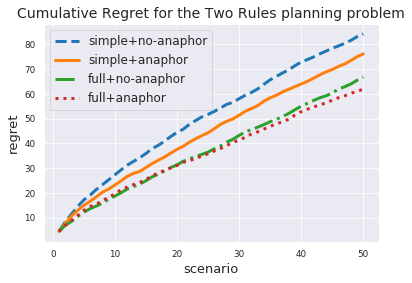

In [51]:

plot_big_experiments([37, 41, 38, 42] , ['simple+no-anaphor', 'simple+anaphor', 'full+no-anaphor', 'full+anaphor'], title='Cumulative Regret for the Two Rules planning problem')
#plot_big_experiments([37, 38, 41, 42, 44, 45] , ['old', 'old+no-corr', 'new', 'new+no-corr', 'old+no-corr2', 'old2'])



In [20]:
def do_ttest(old, old_nocorr, new, new_nocorr):
    total_old = get_cumsum(old)[:,-1]
    total_new = get_cumsum(new)[:,-1]
    total_old_no_corr = get_cumsum(old_nocorr)[:,-1]
    total_new_no_corr = get_cumsum(new_nocorr)[:,-1]
    
    print('old vs new')
    print(ttest_ind(total_old, total_new), np.mean(total_old), np.mean(total_new))
    print(ttest_ind(total_old, total_new, equal_var=False))
    print('old vs old no corr')
    print(ttest_ind(total_old, total_old_no_corr), np.mean(total_old), np.mean(total_old_no_corr))
    print(ttest_ind(total_old, total_old_no_corr, equal_var=False))
    print('old no corr vs new no corr')
    print(ttest_ind(total_old_no_corr, total_new_no_corr), np.mean(total_old_no_corr), np.mean(total_new_no_corr))
    print(ttest_ind(total_old_no_corr, total_new_no_corr, equal_var=False))
    print('new vs new no corr')
    print(ttest_ind(total_new, total_new_no_corr), np.mean(total_new), np.mean(total_new_no_corr))
    
def do_ttest_rel(old, old_nocorr, new, new_nocorr):
    total_old = get_cumsum(old)[:,-1]
    total_new = get_cumsum(new)[:,-1]
    total_old_no_corr = get_cumsum(old_nocorr)[:,-1]
    total_new_no_corr = get_cumsum(new_nocorr)[:,-1]

    total_old = total_old[:len(total_new)]
    print(total_new_no_corr)
    print(total_new)
    print(np.min(total_old), np.max(total_old), np.min(total_new), np.max(total_new), np.var(total_old_no_corr), np.var(total_new_no_corr))
    
    print('old vs new')
    print(ttest_rel(total_old, total_new), np.mean(total_old), np.mean(total_new))
    print(ttest_rel(total_old, total_new))
    print('old vs old no corr')
    print(ttest_rel(total_old, total_old_no_corr), np.mean(total_old), np.mean(total_old_no_corr))
    print(ttest_rel(total_old, total_old_no_corr))
    print('old no corr vs new no corr')
    print(ttest_rel(total_old_no_corr, total_new_no_corr), np.mean(total_old_no_corr), np.mean(total_new_no_corr))
    print(ttest_rel(total_old_no_corr, total_new_no_corr))
    print('new vs new no corr')
    print(ttest_rel(total_new, total_new_no_corr), np.mean(total_new), np.mean(total_new_no_corr))

In [21]:
#do_ttest(37, 38, 41, 42)
#print()
do_ttest_rel(37, 38, 41, 42)

[ 55.  52.  64.  47.  79.  58.  85.  78.  48.  51.  47.  61. 111.  59.
  75.  60.  68.  62.  47.  65.  54.  43.  33.  78.  39.  46.  86.  66.
  82.  43.  46.  55.  16.  67.  57.  54.  81. 101.  32.  55.  65.  61.
  89.  84.  61.  70.  85.  45.  65.]
[ 87.  69.  94.  87.  94.  89.  97.  57.  73.  53.  56.  49.  49.  45.
  53.  72. 102.  71.  56.  49.  90.  61.  41.  76.  52. 102.  82.  70.
  59.  58.  66.  55.  23. 108.  51.  64.  82.  39. 237.  84. 108. 224.
  80.  84.  84.  55.  66.  85.  44.]
44.0 231.0 23.0 237.0 346.3781757600999 326.61224489795916
old vs new
Ttest_relResult(statistic=1.5105166117265072, pvalue=0.1374672924454654) 84.20408163265306 76.16326530612245
Ttest_relResult(statistic=1.5105166117265072, pvalue=0.1374672924454654)
old vs old no corr
Ttest_relResult(statistic=2.4969559433717676, pvalue=0.01601053925317483) 84.20408163265306 66.77551020408163
Ttest_relResult(statistic=2.4969559433717676, pvalue=0.01601053925317483)
old no corr vs new no corr
Ttest_relResult(st

In [16]:
total_old = get_cumsum(10)[:,-1]
total_new = get_cumsum(33)[:,-1]
total_old_no_corr = get_cumsum(34)[:,-1]
total_new_no_corr = get_cumsum(36)[:,-1]

In [15]:
#do_ttest(10, 34, 33, 36)
#print()
do_ttest_rel(10, 34, 33, 36)

47.0 295.0 30.0 230.0 1206.9716 1087.84
old vs new
Ttest_relResult(statistic=2.6025268583663825, pvalue=0.012207823243441248) 128.2 105.78
Ttest_relResult(statistic=2.6025268583663825, pvalue=0.012207823243441248)
old vs old no corr
Ttest_relResult(statistic=4.3847011359093075, pvalue=6.140257779117666e-05) 128.2 83.22
Ttest_relResult(statistic=4.3847011359093075, pvalue=6.140257779117666e-05)
old no corr vs new no corr
Ttest_relResult(statistic=2.0819747371202104, pvalue=0.0425891395059747) 83.22 75.2
Ttest_relResult(statistic=2.0819747371202104, pvalue=0.0425891395059747)
new vs new no corr
Ttest_relResult(statistic=3.883278131482491, pvalue=0.0003087244527108747) 105.78 75.2


In [21]:
np.mean(np.cumsum(discounted_data, axis=1), axis=0)

array([ 11.4 ,  18.88,  25.  ,  31.04,  36.48,  41.32,  45.56,  51.76,
        56.84,  62.68,  67.6 ,  72.4 ,  77.6 ,  82.92,  88.56,  92.64,
        97.92, 102.48, 106.56, 112.08, 117.6 , 122.68, 127.68, 132.32,
       138.52, 143.48, 149.16, 154.44, 159.48, 164.32, 168.92, 173.96,
       178.44, 183.16, 186.36, 191.36, 196.4 , 202.16, 206.56, 211.16,
       216.32, 221.36, 227.2 , 231.84, 235.92, 239.24, 243.2 , 247.48,
       251.6 , 256.4 ])

In [92]:
print(raw_data[:, -2])

[-20 -10 -14 -12 -22 -10 -10 -14 -16 -10 -16 -10 -14 -20 -12 -10 -10 -10
 -10 -10 -32 -14 -18 -10 -12 -10 -20 -12 -26 -16 -10 -14 -18 -20 -12 -10
 -10 -12 -10 -10 -16 -14 -12 -24 -12 -10 -20 -14 -12 -16]


In [36]:
experiments[experiments.index in values]

ValueError: Lengths must match to compare

In [37]:
experiments.iloc[values]

,config_name,experiment_file,neural_config,status
index,,,,
504,bigthreerules/bigthreerules43,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
505,bigthreerules/bigthreerules41,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
506,bigthreerules/bigthreerules2,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
507,bigthreerules/bigthreerules18,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
508,bigthreerules/bigthreerules23,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
509,bigthreerules/bigthreerules34,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
510,bigthreerules/bigthreerules47,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
511,bigthreerules/bigthreerules6,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
512,bigthreerules/bigthreerules27,/home/mappelgren/Desktop/correcting-agent/resu...,fixed_bw,done
